# Running Elegant with XOPT + Archiving

In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
lume_path = ''
sys.path.append(lume_path + 'openPMD-beamphysics')
sys.path.append(lume_path + 'distgen')
sys.path.append(lume_path + 'xopt')
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'

In [2]:
# Import the class
from xopt import Xopt

### Make YAML and Run with Random Inputs

In [3]:
# Make a proper input file. 
YAML="""
xopt: {output_path: output , verbose: true, algorithm: cnsga}

algorithm:
  name: cnsga
  options: {max_generations: 3, population_size: 16, crossover_probability: 0.9, mutation_probability: 1.0,
  selection: auto, verbose: true, population: null}
  
simulation: 
  name: test_elegant
  evaluate: run_elegant.evaluate_elegant  
vocs:
  name: Elegant_test
  description: null
  simulation: test_elegant
  templates: null
  variables:
    L1_9_50_phase: [30, 70]
    L1_9_25_phase: [50, 80]
    L1_10_25_phase: [30, 70]
    X1_Xband_phase: [-120, -50]
#    L2_10_50_phase: [30, 70]
    L2_10_25_phase: [30, 60]
#    X_MAX: [0.5e-3, 3.0e-3]
#    DX: [0.9e-3, 1.1e-3]
#    DP: [10.0e-5, 18.0e-5]
  objectives:
    sigma_pz: MINIMIZE
    norm_emit_x: MINIMIZE
#    sigma_t: MINIMIZE
#    ptp_t: MINIMIZE
#    core_pz: MINIMIZE
#    core_current: MAXIMIZE
  constraints:
 #   sigma_pz: [LESS_THAN, 4.0e+6]
    norm_emit_x: [LESS_THAN, 0.6e-6]
    ptp_t: [LESS_THAN, 6.0e-14]
  #  sigma_t: [LESS_THAN, 3.0e-15]
  #  mean_pz: [GREATER_THAN, 6.0e+9]
    charge: [GREATER_THAN, 5.0e-11]
  linked_variables: {L2_10_50_phase: L2_10_25_phase}
  constants: 
#    L1_9_25_phase: 65.108
#    L2_10_25_phase: 57.0
    L3_10_25_volt: 1.6628471874e+7
    L3_10_50_volt: 1.6628471874e+7
    X_MAX: 5.0e-3
    DX: 1.1e-3
    DP: 16.0e-5
    INPUT_FILE: /global/u2/a/aedelen/elegant_example/elegant_particles.txt
    sample_interval: 1000
    elename: LCLS2cuH.ele #Note this will make a new file 'run<elename>.ele' and modify the path_search etc below in that new file
    ltename: LCLS2cuH.lte
    ELEGANT_BIN: /global/cfs/cdirs/m669/aliaksei/elegant2020_rhel7/oag/apps/bin/linux-x86_64/elegant
    HDF5_BIN: /global/cfs/cdirs/m669/aliaksei/elegant2020_rhel7/epics/extensions/bin/linux-x86_64/sdds2hdf
    path_search: /global/homes/a/aedelen/GitHub/lcls-lattice/elegant, /global/homes/a/aedelen/GitHub/lcls-lattice/elegant/rmat,/global/homes/a/aedelen/GitHub/lcls-lattice/elegant/wakefields,/global/homes/a/aedelen/GitHub/lcls-lattice/elegant/beams
    finput_name: HXRSTART.out
    foutput_name: HXRSTART.h5
    H5_SAVE: ./output/beams/  #Note need to make this directory  if does not already exist
  #  timeout: 180
    

"""



In [4]:
X = Xopt(YAML)

Loading config as text


In [5]:
X


            Xopt 
________________________________           
Version: 0.4.1
Configured: True
Config as YAML:
xopt: {output_path: /global/u2/a/aedelen/elegant_example/output, verbose: true, algorithm: cnsga}
algorithm:
  name: cnsga
  function: xopt.cnsga.cnsga
  options: {max_generations: 3, population_size: 16, crossover_probability: 0.9, mutation_probability: 1.0,
    selection: auto, verbose: true, population: null, seed: null}
simulation:
  name: test_elegant
  evaluate: run_elegant.evaluate_elegant
  options: {a: 1}
vocs:
  name: Elegant_test
  description: null
  simulation: test_elegant
  templates: null
  variables:
    L1_9_50_phase: [30, 70]
    L1_9_25_phase: [50, 80]
    L1_10_25_phase: [30, 70]
    X1_Xband_phase: [-120, -50]
    L2_10_25_phase: [30, 60]
  objectives: {sigma_pz: MINIMIZE, norm_emit_x: MINIMIZE}
  constraints:
    norm_emit_x: [LESS_THAN, 6.0e-07]
    ptp_t: [LESS_THAN, 6.0e-14]
    charge: [GREATER_THAN, 5.0e-11]
  linked_variables: {L2_10_50_phase: L2_1

## Do one run with random inputs

In [6]:
X.random_evaluate()

/global/cfs/cdirs/m669/aliaksei/elegant2020_rhel7/oag/apps/bin/linux-x86_64/elegant runLCLS2cuH.ele -macro=L1_9_50_phase=66.12029395749502  -macro=L1_9_25_phase=75.15247526050535  -macro=L1_10_25_phase=68.68545758688222  -macro=X1_Xband_phase=-60.86308079294931  -macro=L2_10_25_phase=33.3635605039032  -macro=L3_10_25_volt=16628471.874  -macro=L3_10_50_volt=16628471.874  -macro=X_MAX=0.005  -macro=DX=0.0011  -macro=DP=0.00016  -macro=INPUT_FILE=/global/u2/a/aedelen/elegant_example/elegant_particles.txt  -macro=sample_interval=1000  -macro=H5_SAVE=./output/beams/  -macro=L2_10_50_phase=33.3635605039032 


{'sigma_pz': 11777207.61981331,
 'norm_emit_x': 1.5278980166310137e-06,
 'sigma_t': 9.600604245301205e-14,
 'mean_pz': 4408457674.418015,
 'charge': 1.404e-10,
 'ptp_t': 5.367621028979697e-13,
 'core_norm_emit_x': 9.589131689811938e-07,
 'core_pz': 1382245.1006769156,
 'core_current': 612.8819679448792,
 'archive': './output/beams/elegant_sim_852eb0e264a5ca620a7a9436e27dbd54.h5'}

In [7]:
X


            Xopt 
________________________________           
Version: 0.4.1
Configured: True
Config as YAML:
xopt: {output_path: /global/u2/a/aedelen/elegant_example/output, verbose: true, algorithm: cnsga}
algorithm:
  name: cnsga
  function: xopt.cnsga.cnsga
  options: {max_generations: 3, population_size: 16, crossover_probability: 0.9, mutation_probability: 1.0,
    selection: auto, verbose: true, population: null, seed: null}
simulation:
  name: test_elegant
  evaluate: run_elegant.evaluate_elegant
  options: {a: 1}
vocs:
  name: Elegant_test
  description: null
  simulation: test_elegant
  templates: null
  variables:
    L1_9_50_phase: [30, 70]
    L1_9_25_phase: [50, 80]
    L1_10_25_phase: [30, 70]
    X1_Xband_phase: [-120, -50]
    L2_10_25_phase: [30, 60]
  objectives: {sigma_pz: MINIMIZE, norm_emit_x: MINIMIZE}
  constraints:
    norm_emit_x: [LESS_THAN, 6.0e-07]
    ptp_t: [LESS_THAN, 6.0e-14]
    charge: [GREATER_THAN, 5.0e-11]
  linked_variables: {L2_10_50_phase: L2_1

## Run GA

In [8]:
# Pick one of these
#from concurrent.futures import ThreadPoolExecutor as PoolExecutor
from concurrent.futures import ProcessPoolExecutor as PoolExecutor

executor = PoolExecutor()
# This will also work. 
#executor=None

In [9]:
# Change max generations
X.algorithm['options']['max_generations'] = 3
X.run(executor=executor)

Starting at time 2020-11-11T15:53:32-08:00



 ▄████▄   ███▄    █   ██████   ▄████  ▄▄▄      
▒██▀ ▀█   ██ ▀█   █ ▒██    ▒  ██▒ ▀█▒▒████▄    
▒▓█    ▄ ▓██  ▀█ ██▒░ ▓██▄   ▒██░▄▄▄░▒██  ▀█▄  
▒▓▓▄ ▄██▒▓██▒  ▐▌██▒  ▒   ██▒░▓█  ██▓░██▄▄▄▄██ 
▒ ▓███▀ ░▒██░   ▓██░▒██████▒▒░▒▓███▀▒ ▓█   ▓██▒
░ ░▒ ▒  ░░ ▒░   ▒ ▒ ▒ ▒▓▒ ▒ ░ ░▒   ▒  ▒▒   ▓▒█░
  ░  ▒   ░ ░░   ░ ▒░░ ░▒  ░ ░  ░   ░   ▒   ▒▒ ░
░           ░   ░ ░ ░  ░  ░  ░ ░   ░   ░   ▒   
░ ░               ░       ░        ░       ░  ░
░                                              


Continuous Non-dominated Sorting Genetic Algorithm
Version 0.4.1

Creating toolbox from vocs.
Created toolbox with 5 variables, 3 constraints, and 2 objectives.
    Using selection algorithm: nsga2
vocs:
{'constants': {'DP': 0.00016,
               'DX': 0.0011,
               'ELEGANT_BIN': '/global/cfs/cdirs/m669/aliaksei/elegant2020_rhel7/oag/apps/bin/linux-x86_64/elegant',
               'H5_SAVE': './output/beams/',
               'HDF5_BIN': '/global/cfs/cdirs/m

In [10]:
#settings = {'L1_10_25_phase': 48.10988000636041,
#'L1_9_25_phase': 7.722087823054991,
#'L1_9_50_phase': -34.63546794399416,
#'L2_10_50_phase': -49.99535063902283,
#'X1_Xband_phase': 97.87343465656124,
#'L2_10_25_phase': 55.5}

In [11]:
#X.evaluate(settings)

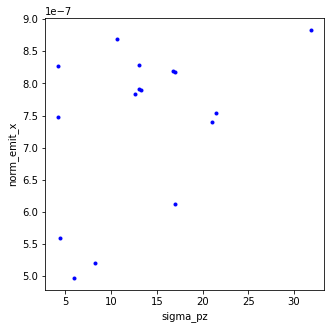

In [12]:
# Extract objectives from output
import numpy as np
key1, key2 = list(X.vocs['objectives'])

x = [o[key1] for o in X.population['outputs']]
y = [o[key2] for o in X.population['outputs']]

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5,5))

#ax.scatter(x, y, color='blue')
ax.plot(np.asarray(x)/1.0e6, np.asarray(y),'.', color='blue')
#ax.set_xlim(X_RANGE)
#ax.set_ylim(Y_RANGE)
ax.set_xlabel(key1)
ax.set_ylabel(key2)
ax.set_aspect('auto')
#ax.set_title(NAME)

## Load Data from Json

In [13]:
from xopt.dataset import load_all_xopt_data

In [14]:
from glob import glob
jlist = glob('output/gen*json')
jlist

['output/gen_2.json', 'output/gen_3.json', 'output/gen_1.json']

In [15]:
DAT = load_all_xopt_data(jlist)


In [16]:
DAT

,L1_10_25_phase,L1_9_25_phase,L1_9_50_phase,L2_10_25_phase,X1_Xband_phase,L3_10_25_volt,L3_10_50_volt,X_MAX,DX,DP,...,sigma_pz,norm_emit_x,sigma_t,mean_pz,charge,ptp_t,core_norm_emit_x,core_pz,core_current,archive
0,57.240353,66.600114,39.124532,47.508477,-91.400027,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,1.994951e+07,9.835209e-07,8.780450e-14,5.475744e+09,1.423500e-10,4.065043e-13,4.268045e-07,2.221883e+06,718.711995,./output/beams/elegant_sim_d59821fa7d815515a41...
1,49.593807,54.893879,65.203279,35.405147,-89.702076,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,3.471747e+07,1.434865e-06,4.382046e-13,4.569027e+09,1.464000e-10,1.845558e-12,3.541412e-07,9.212885e+05,156.799650,./output/beams/elegant_sim_13d90d87078d718449e...
2,41.161003,54.669346,46.379924,30.793007,-101.740808,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,3.088979e+07,1.236156e-06,4.923358e-13,4.166738e+09,1.456500e-10,2.064339e-12,3.309025e-07,8.932606e+05,130.602813,./output/beams/elegant_sim_b3fda5f5ac4a33da695...
3,31.112332,63.791038,61.624634,57.598454,-61.693914,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,1.694090e+07,6.124623e-07,6.762040e-14,6.100295e+09,1.167000e-10,2.527377e-13,3.667874e-07,1.827012e+06,647.385196,./output/beams/elegant_sim_e24bde1f8c596920602...
4,51.836376,70.055598,56.339428,40.952093,-103.936187,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,5.499202e+07,1.197168e-06,5.378485e-13,5.018376e+09,1.225500e-10,1.986043e-12,2.713560e-07,9.862127e+05,99.002161,./output/beams/elegant_sim_2ca745efa43aaa09009...
5,48.608019,71.471890,60.955666,54.811594,-95.351702,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,4.416717e+07,1.298173e-06,7.476644e-14,5.947286e+09,1.495500e-10,3.476824e-13,3.166399e-07,1.947167e+06,917.426569,./output/beams/elegant_sim_29288250cc0f4c020b5...
6,47.839532,51.580617,39.330411,49.769040,-78.581162,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,2.728703e+07,8.893890e-07,5.475166e-14,5.620262e+09,1.219500e-10,2.344671e-13,3.051427e-07,3.159052e+06,892.877301,./output/beams/elegant_sim_3bef3f17c2f9fdadb3d...
7,33.250505,69.744872,37.511588,43.513408,-73.478993,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,3.518471e+07,1.060949e-06,2.330756e-13,5.187551e+09,1.158000e-10,8.493325e-13,3.452767e-07,9.735425e+05,227.293482,./output/beams/elegant_sim_8d10218e8f1d54cffbd...
8,64.190279,55.877231,39.596658,36.345364,-101.987758,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,4.579833e+07,1.613264e-06,5.725369e-13,4.641698e+09,1.461000e-10,2.260109e-12,3.364895e-07,9.277578e+05,129.264844,./output/beams/elegant_sim_d4a8b1541c6b5b139c0...
9,64.177285,65.324058,49.948814,37.183901,-102.836107,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,5.233685e+07,1.626160e-06,6.395642e-13,4.721548e+09,1.171500e-10,2.317187e-12,4.759897e-07,1.084037e+06,96.318528,./output/beams/elegant_sim_8e39d7b235f38df1eff...


In [17]:
#see archive file list --> particle distributions

In [18]:
DAT['archive']

0     ./output/beams/elegant_sim_d59821fa7d815515a41...
1     ./output/beams/elegant_sim_13d90d87078d718449e...
2     ./output/beams/elegant_sim_b3fda5f5ac4a33da695...
3     ./output/beams/elegant_sim_e24bde1f8c596920602...
4     ./output/beams/elegant_sim_2ca745efa43aaa09009...
5     ./output/beams/elegant_sim_29288250cc0f4c020b5...
6     ./output/beams/elegant_sim_3bef3f17c2f9fdadb3d...
7     ./output/beams/elegant_sim_8d10218e8f1d54cffbd...
8     ./output/beams/elegant_sim_d4a8b1541c6b5b139c0...
9     ./output/beams/elegant_sim_8e39d7b235f38df1eff...
10    ./output/beams/elegant_sim_61e9058feca6205cef4...
11    ./output/beams/elegant_sim_fdfa7a4aece3b3bbe64...
12    ./output/beams/elegant_sim_48da6600fbb2e75cbdd...
13    ./output/beams/elegant_sim_00253f90fc06919f721...
14    ./output/beams/elegant_sim_a97b516366e419d835d...
15    ./output/beams/elegant_sim_b5a72dd2727f3c8b71c...
16    ./output/beams/elegant_sim_ee945e47154a9309c8d...
17    ./output/beams/elegant_sim_6adc6146be5f570

In [19]:
DAT['archive'][0]

'./output/beams/elegant_sim_d59821fa7d815515a41157b4a3af03a5.h5'

## Load Particle Distribution

In [20]:
from pmd_beamphysics import ParticleGroup
from h5py import File
import h5py

In [21]:
with h5py.File(DAT['archive'][0], 'r') as h5:
    print(list(h5.attrs))

['basePath', 'chargeUnitSI', 'dataType', 'numParticles', 'openPMD', 'openPMDextension', 'particlesPath', 'speciesType', 'totalCharge']


In [22]:
# This will convert to a data dict
P = ParticleGroup(DAT['archive'][10])
P

<ParticleGroup with 936 particles at 0x2aaad3e358b0>

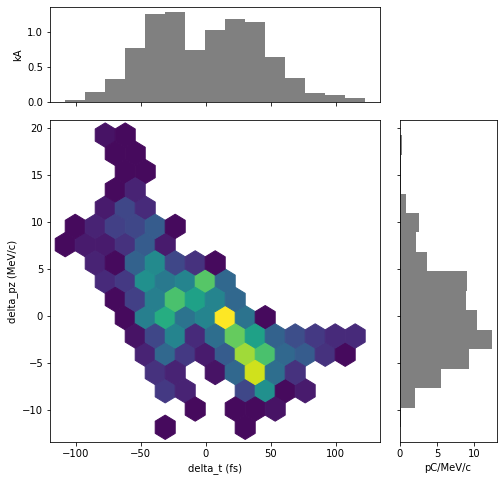

In [23]:
P.plot('delta_t', 'delta_pz', figsize=(8,8))

In [24]:
P['mean_energy'], P.units('mean_energy')

(6211885537.743958, pmd_unit('eV', 1.602176634e-19, (2, 1, -2, 0, 0, 0, 0)))

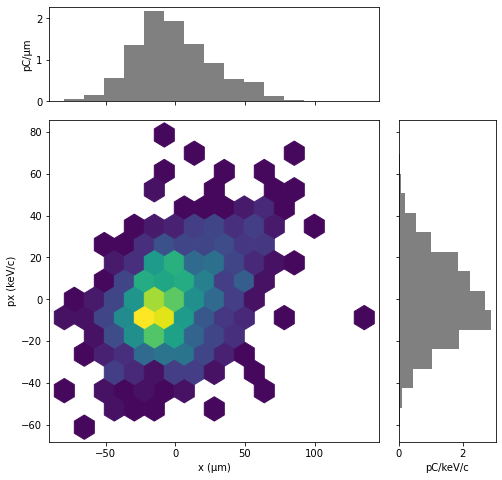

In [25]:
P.plot('x', 'px', figsize=(8,8))

In [26]:
P2=P.where(P.x < P['mean_x'])

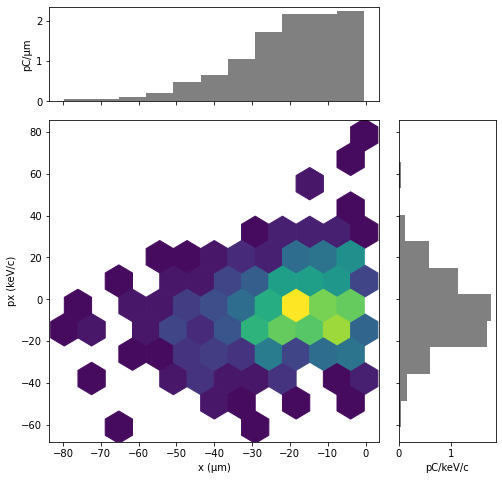

In [27]:
P2.plot('x', 'px', figsize=(8,8))